# Présentation du TP sur la coloration

Dans ce TP, l'objectif est de pouvoir faire de la coloration de graphe, en utilisant l'algorithme de Welsh et Powell. 

La représentation choisie pour les graphes est une matrice d'adjacence, qui sera représentée par un tableau de tableau (les noms des sommets sont des entiers et seront numérotés en commençant à 0). Nous considérons que le nombre de sommets du graphe ne pourra pas être modifié une fois le graphe construit.



## Installation de graphviz pour pouvoir visualiser les graphes


In [1]:
!pip install graphviz
import graphviz
graphviz.__version__, graphviz.version()

('0.19.1', (2, 43, 0))



## Création d'une fonction de conversion d'un graphe, défini par une matrice d'adjacence, vers le format graphviz


In [2]:
def creation_graphe_graphviz(g):
    # création d'un graphe non orienté
    dot = graphviz.Graph()
    
    # ajout des sommets
    for i in range(len(g)):
        dot.node(str(i))
    
    # ajout des arcs
    for i in range(len(g)):
        for j in range(i):
            if g[i][j] == 1:
                dot.edge(str(i), str(j))
    
    return dot

 ## Création et affichage d'un premier graphe non orienté

In [3]:
graphe1 = [[0,1,1],
          [1,0,1],
          [1,1,0]]

#### Affichage de la matrice

In [4]:
print(graphe1)

[[0, 1, 1], [1, 0, 1], [1, 1, 0]]


#### Création du graphe associé, au format graphviz, pour pouvoir faire l'affichage de la représentation sagittale du graphe


In [5]:
gdot1 = creation_graphe_graphviz(graphe1)
print(gdot1.source)

graph {
	0
	1
	2
	1 -- 0
	2 -- 0
	2 -- 1
}



#### Affichage de la représentation sagittale du graphe

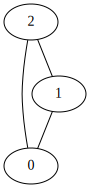

In [6]:
gdot1

## Création et affichage d'un deuxième graphe non orienté

In [7]:
graphe2 = [[0,1,1,1,0,0,0],
           [1,0,0,1,0,0,1],
           [1,0,0,1,1,0,0],
           [1,1,1,0,0,0,0],
           [0,0,1,0,0,1,0],
           [0,0,0,0,1,0,0],
           [0,1,0,0,0,0,0]]

#### Création et affichage du graphe associé, au format graphviz


graph {
	0
	1
	2
	3
	4
	5
	6
	1 -- 0
	2 -- 0
	3 -- 0
	3 -- 1
	3 -- 2
	4 -- 2
	5 -- 4
	6 -- 1
}



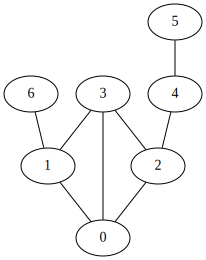

In [8]:
gdot2 = creation_graphe_graphviz(graphe2)
print(gdot2.source)
gdot2



## Fonction qui donne la coloration des sommets d'un graphe, en utilisant l'algorithme de Welsh-Powell, sous la forme d'une liste.


In [9]:
def successeurs(g,s):
    succs = []
    for i in range(len(g)):
        if g[s][i]==1:
            succs.append(i)
    return succs


In [10]:
def predecesseurs(g,s):
    preds = []
    for i in range(len(g)):
        if g[i][s]==1:
            preds.append(i)
    return preds

In [11]:

def degre(g,s):
    degre = predecesseurs(g,s)

    return len(degre)

In [12]:
def coloration_sommets_welsh_powell(graphe):
    couleurs = []
    tabwp= [[],[],[],[]]
    for i in range(len(graphe)):
        tabwp[0].append(i)
        tabwp[1].append(degre(graphe,i))
    for i in range(len(graphe)):
	    j = i
	    while j > 0: 
            if tabwp[1][j] < tabwp[1][j-1]:
			    tabwp[1][j], tabwp[1][j-1] = tabwp[1][j-1], tabwp[1][j]
			    tabwp[0][j], tabwp[0][j-1] = tabwp[0][j-1], tabwp[0][j]
			    j -= 1
		

    return print("",tabwp[0],"\n",tabwp[1],"\n",tabwp[2],"\n", tabwp[3])

TabError: inconsistent use of tabs and spaces in indentation (2947544706.py, line 10)

In [ ]:
# test de la fonction coloration_sommets_welsh_powell
print("coloration des sommets du graphe 1")
couleurs_sommets_1 = coloration_sommets_welsh_powell(graphe1)
print(couleurs_sommets_1)

print("\ncoloration des sommets du graphe 2")
couleurs_sommets_2 = coloration_sommets_welsh_powell(graphe2)
print(couleurs_sommets_2)

coloration des sommets du graphe 1
 [0, 1, 2] 
 [2, 2, 2] 
 [] 
 []
None

coloration des sommets du graphe 2
 [0, 1, 2, 3, 4, 5, 6] 
 [3, 3, 3, 3, 2, 1, 1] 
 [] 
 []
None




## Fonction qui donne la coloration des arêtes d'un graphe, en utilisant l'algorithme de Welsh-Powell, sous la forme d'une liste.



In [ ]:
def coloration_aretes_welsh_powell(graphe):
    couleurs = []
    #à définir
    return couleurs

In [ ]:
# test de la fonction coloration_aretes_welsh_powell
print("coloration des arêtes du graphe 1")
couleurs_aretes_1 = coloration_aretes_welsh_powell(graphe1)
print(couleurs_aretes_1)

print("\ncoloration des arêtes du graphe 2")
couleurs_aretes_2 = coloration_aretes_welsh_powell(graphe2)
print(couleurs_aretes_2)

coloration des arêtes du graphe 1
[]

coloration des arêtes du graphe 2
[]



## Bonus 
Une fois votre algorithme Welsh-Powell implémenté, vous pouvez chercher un moyen d'afficher votre graphe, avec les couleurs mises sur les sommets ou les arêtes, selon la coloration choisie (en utilisant le projet graphviz pour Python : https://pypi.org/project/graphviz/). 

Vous pouvez également ajouter une méthode permettant de charger un fichier contenant la description de votre graphe, au format utilisé par graphviz (format dot), pour initialiser votre matrice d'adjacence. 

Vous pouvez enfin tester votre code, en reprenant les exemples du cours et du TD.